### 90 データの準備

In [1]:
! tar zxvf kftt-data-1.0.tar.gz

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/data/tok/kyoto-train.cln.en
kftt-data-1.0/data/tok/kyoto-dev.en
kftt-data-1.0/data/tok/kyoto-train.en
kftt-data-1.0/data/tok/kyoto-tune.ja
kftt-data-1.0/data/tok/kyoto-train.cln.ja
kftt-data-1.0/data/tok/kyoto-train.ja
kftt-data-1.0/data/tok/kyoto-test.ja
kftt-data-1.0/data/tok/kyoto-test.en
kftt-data-1.0/README.txt


ginzaで形態素解析

In [2]:
%%bash
cat kftt-data-1.0/data/orig/kyoto-train.ja | sed 's/\s+/ /g' | ginzame > train.ginza.ja
cat kftt-data-1.0/data/orig/kyoto-dev.ja | sed 's/\s+/ /g' | ginzame > dev.ginza.ja
cat kftt-data-1.0/data/orig/kyoto-test.ja | sed 's/\s+/ /g' | ginzame > test.ginza.ja

In [3]:
! head train.ginza.ja

雪舟	名詞,固有名詞,人名,一般,*,*,雪舟,セッシュウ,*
（	補助記号,括弧開,*,*,*,*,（,キゴウ,*
せっ	名詞,固有名詞,人名,一般,*,*,せっ,セッ,*
しゅう	名詞,固有名詞,人名,名,*,*,しゅう,シュウ,*
、	補助記号,読点,*,*,*,*,、,、,*
1420	名詞,数詞,*,*,*,*,1420,イチヨンニレイ,*
年	名詞,普通名詞,助数詞可能,*,*,*,年,ネン,*
（	補助記号,括弧開,*,*,*,*,（,キゴウ,*
応永	名詞,固有名詞,一般,*,*,*,応永,オウエイ,*
27	名詞,数詞,*,*,*,*,27,ニシチ,*


spacyで単語分割

In [4]:
import re
import spacy

In [5]:
nlp = spacy.load('en')

In [6]:
for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.en', 'train.spacy.en'),
    ('kftt-data-1.0/data/orig/kyoto-dev.en', 'dev.spacy.en'),
    ('kftt-data-1.0/data/orig/kyoto-test.en', 'test.spacy.en'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = nlp.make_doc(x)
            x = ' '.join([doc.text for doc in x])
            print(x, file=g)

In [7]:
! head train.spacy.en

Known as Sesshu ( 1420 - 1506 ) , he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century , and was called a master painter .
He revolutionized the Japanese ink painting .
He was given the posthumous name " Toyo " or " Sesshu ( 拙宗 ) . "
Born in Bicchu Province , he moved to Suo Province after entering SShokoku - ji Temple in Kyoto .
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink painting .
His works were many , including not only Chinese - style landscape paintings , but also portraits and pictures of flowers and birds .
His bold compositions and strong brush strokes constituted an extremely distinctive style .
6 of his extant works are designated national treasures . Indeed , he is considered to be extraordinary among Japanese painters .
For this reason , there are a great many artworks that are attributed to him , such as folding screens with pictures of flowers and that birds are painted on them .
There a

ginzaの解析結果から形態素に分割

In [8]:
for src, dst in [
    ('train.ginza.ja', 'train.spacy.ja'),
    ('dev.ginza.ja', 'dev.spacy.ja'),
    ('test.ginza.ja', 'test.spacy.ja'),
]:
    with open(src) as f:
        lst = []
        tmp = []
        for x in f:
            x = x.strip()
            if x == 'EOS':
                lst.append(' '.join(tmp))
                tmp = []
            elif x != '':
                tmp.append(x.split('\t')[0])
    with open(dst, 'w') as f:
        for line in lst:
            print(line, file=f)

In [9]:
! head train.spacy.ja

雪舟 （ せっ しゅう 、 1420 年 （ 応永 27 年 ） - 1506 年 （ 永正 3 年 ） ） は 号 で 、 15 世紀 後半 室町 時代 に 活躍 し た 水墨 画家 ・ 禅僧 で 、 画聖 と も 称え られる 。
日本 の 水墨画 を 一変 さ せ た 。
諱 は 「 等楊 （ とう よう ） 」 、 もしくは 「 拙 宗 （ せっ しゅう ） 」 と 号し た 。
備中 国 に 生まれ 、 京都 ・ 相国 寺 に 入っ て から 周防 国 に 移る 。
その 後 遣明 使 に 随行 し て 中国 （ 明 ） に 渡っ て 中国 の 水墨画 を 学ん だ 。
作品 は 数多く 、 中国 風 の 山水画 だけ で なく 人物画 や 花鳥画 も よく し た 。
大胆 な 構図 と 力強い 筆線 は 非常 に 個性的 な 画風 を 作り出し て いる 。
現存 する 作品 の うち 6 点 が 国宝 に 指定 さ れ て おり 、 日本 の 画家 の なか で も 別格 の 評価 を 受け て いる と いえる 。
この ため 、 花鳥 図 屏風 など に 「 伝 雪舟 筆 」 さ れる 作品 は 大変 多い 。
真筆 で ある か 専門家 の 間 で も 意見 の 分かれる もの も 多々 ある 。


### 91. 機械翻訳モデルの訓練

In [10]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.spacy \
    --validpref dev.spacy \
    --destdir data91  \
    --thresholdsrc 5 \
    --thresholdtgt 5 \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data91', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=5, thresholdtgt=5, tokenizer=None, trainpref='train.spacy', user_dir=None, validpref='dev.spacy', workers=20)
| [ja] Dictionary: 60247 types
| [ja] train.spacy.ja: 440288 sents, 11298955 tokens, 1.41% replaced by <unk>
| [ja] Dictionary: 60247 types
| [ja] dev.spacy.ja: 1166 sents, 25550 tokens, 1.54% replaced by <unk>
| [en] Dictionary: 55495 types
| [

In [12]:
! fairseq-train data91 \
    --fp16 \
    --save-dir save91 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 91.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 16 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


### 92. 機械翻訳モデルの適用

In [13]:
!fairseq-interactive --path save91/checkpoint10.pt data91 < test.spacy.ja | grep '^H' | cut -f3 > 92.out

### 93. BLEUスコアの計測

In [14]:
!fairseq-score --sys 92.out --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='92.out')
BLEU4 = 22.71, 53.4/27.8/16.7/10.7 (BP=1.000, ratio=1.009, syslen=27864, reflen=27625)


### 94. ビーム探索

In [15]:
%%bash
for N in `seq 1 20` ; do
    fairseq-interactive --path save91/checkpoint10.pt --beam $N data91 < test.spacy.ja | grep '^H' | cut -f3 > 94.$N.out
done

In [16]:
%%bash
for N in `seq 1 20` ; do
    fairseq-score --sys 94.$N.out --ref test.spacy.en > 94.$N.score
done

In [17]:
import matplotlib.pyplot as plt

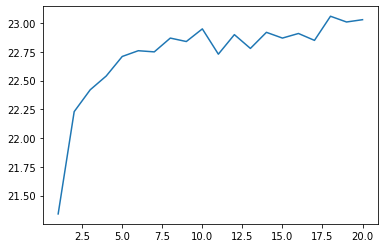

In [18]:
def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

xs = range(1, 21)
ys = [read_score(f'94.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

### 95. サブワード化

In [19]:
import sentencepiece as spm

In [20]:
spm.SentencePieceTrainer.Train('--input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

True

In [21]:
sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

True

In [22]:
for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.ja', 'train.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-dev.ja', 'dev.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-test.ja', 'test.sub.ja'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=g)

In [23]:
! head train.sub.ja

▁ 雪 舟 ( せ っ しゅう 、 14 20 年 ( 応永 27 年 )- 150 6 年 ( 永正 3 年 ) ) は 号 で 、 15 世紀後半 室町時代に 活躍した 水墨画 家 ・ 禅僧 で 、 画 聖 とも 称え られる 。
▁日本の 水墨画 を 一 変 させた 。
▁諱は 「 等 楊 ( とう よう ) 」 、 もしくは 「 拙 宗 ( せ っ しゅう ) 」 と号した 。
▁ 備中国 に 生まれ 、 京都 ・ 相国寺 に入って から 周防国 に移る 。
▁その後 遣 明 使 に 随行 して 中国 ( 明 ) に渡って 中国の 水墨画 を学んだ 。
▁ 作品 は 数多く 、 中国 風の 山 水 画 だけでなく 人物 画 や 花鳥 画 も よく した 。
▁大 胆 な 構図 と 力 強い 筆 線 は非常に 個 性 的な 画 風 を作り 出している 。
▁ 現存する 作品 のうち 6 点 が 国宝 に指定され ており 、 日本の 画家 のなかで も 別 格 の 評価 を受けている といえる 。
▁このため 、 花鳥 図屏風 などに 「 伝 雪 舟 筆 」 される 作品 は 大変 多い 。
▁ 真 筆 である か 専門 家 の間で も 意見 の 分かれ るもの も 多 々 ある 。


In [24]:
! subword-nmt learn-bpe -s 16000 < kftt-data-1.0/data/orig/kyoto-train.en > kyoto_en.codes

In [25]:
! subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-train.en > train.sub.en
! subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-dev.en > dev.sub.en
! subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-test.en > test.sub.en

In [26]:
! head train.sub.en

K@@ n@@ own as Ses@@ shu (14@@ 20 - 150@@ 6@@ ), he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century, and was called a master pain@@ ter.
He revol@@ ut@@ ion@@ ized the Japanese ink paint@@ ing.
He was given the posthumous name "@@ Toyo@@ " or "S@@ es@@ shu (@@ 拙@@ 宗@@ )."
Born in Bicchu Province, he moved to Suo Province after entering S@@ Shokoku-ji Temple in Kyoto.
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink paint@@ ing.
His works were man@@ y, including not only Chinese-style landscape paintings, but also portraits and pictures of flowers and bird@@ s.
His b@@ old compos@@ itions and strong brush st@@ rok@@ es const@@ ituted an extremely distinctive style.
6 of his ext@@ ant works are designated national treasu@@ res. In@@ de@@ ed, he is considered to be extraordinary among Japanese pain@@ ters.
For this reason, there are a great many art@@ works that are attributed to him, such as folding scre@@ 

In [27]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --destdir data95  \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data95', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='train.sub', user_dir=None, validpref='dev.sub', workers=20)
| [ja] Dictionary: 15999 types
| [ja] train.sub.ja: 440288 sents, 10735573 tokens, 0.0% replaced by <unk>
| [ja] Dictionary: 15999 types
| [ja] dev.sub.ja: 1166 sents, 24825 tokens, 0.0121% replaced by <unk>
| [en] Dictionary: 20871 types
| [en] tra

In [28]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save95 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 95.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [29]:
!fairseq-interactive --path save95/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.out

In [30]:
def spacy_tokenize(src, dst):
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = ' '.join([doc.text for doc in nlp(x)])
            print(x, file=g)
spacy_tokenize('95.out', '95.out.spacy')

In [31]:
!fairseq-score --sys 95.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='95.out.spacy')
BLEU4 = 20.36, 51.3/25.2/14.7/9.0 (BP=1.000, ratio=1.030, syslen=28463, reflen=27625)


In [32]:
%%bash
for N in `seq 1 10` ; do
    fairseq-interactive --path save95/checkpoint10.pt --beam $N data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.$N.out
done

In [33]:
for i in range(1, 11):
    spacy_tokenize(f'95.{i}.out', f'95.{i}.out.spacy')

In [34]:
%%bash
for N in `seq 1 10` ; do
    fairseq-score --sys 95.$N.out.spacy --ref test.spacy.en > 95.$N.score
done

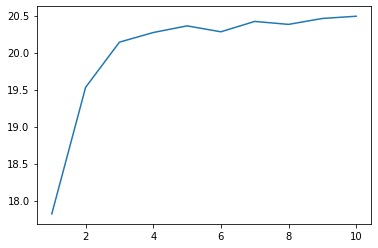

In [35]:
xs = range(1, 11)
ys = [read_score(f'95.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

### 96. 学習過程の可視化

In [37]:
!fairseq-train data95 \
    --fp16 \
    --tensorboard-logdir log96 \
    --save-dir save96 \
    --max-epoch 5 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.2 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 96.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 40 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


pip install tensorboard tensorboardXをして，からtensorboradを起動してlocalhost:6006(など)にアクセスすると以下のような画面が出るはず

<img src='board.png'> 

### 97. ハイパー・パラメータの調整

In [38]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_1 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_1.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [39]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_3 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.3 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_3.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [40]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_5 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.5 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_5.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [41]:
!fairseq-interactive --path save97_1/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_1.out
!fairseq-interactive --path save97_3/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_3.out
!fairseq-interactive --path save97_5/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_5.out

In [42]:
spacy_tokenize('97_1.out', '97_1.out.spacy')
spacy_tokenize('97_3.out', '97_3.out.spacy')
spacy_tokenize('97_5.out', '97_5.out.spacy')

In [43]:
!fairseq-score --sys 97_1.out.spacy --ref test.spacy.en
!fairseq-score --sys 97_3.out.spacy --ref test.spacy.en
!fairseq-score --sys 97_5.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_1.out.spacy')
BLEU4 = 21.42, 51.7/26.3/15.7/9.9 (BP=1.000, ratio=1.055, syslen=29132, reflen=27625)
Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_3.out.spacy')
BLEU4 = 12.99, 38.5/16.5/8.8/5.1 (BP=1.000, ratio=1.225, syslen=33832, reflen=27625)
Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_5.out.spacy')
BLEU4 = 3.49, 21.8/4.9/1.8/0.8 (BP=1.000, ratio=1.122, syslen=31008, reflen=27625)


In [44]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97a \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97a.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [50]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97b \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 2e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97b.log

In [51]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97c \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97c.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 80 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [52]:
!fairseq-interactive --path save97a/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97a.out
!fairseq-interactive --path save97b/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97b.out
!fairseq-interactive --path save97c/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97c.out

In [53]:
spacy_tokenize('97a.out', '97a.out.spacy')
spacy_tokenize('97b.out', '97b.out.spacy')
spacy_tokenize('97c.out', '97c.out.spacy')

In [54]:
!fairseq-score --sys 97a.out.spacy --ref test.spacy.en
!fairseq-score --sys 97b.out.spacy --ref test.spacy.en
!fairseq-score --sys 97c.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97a.out.spacy')
BLEU4 = 20.73, 52.2/25.7/14.9/9.3 (BP=1.000, ratio=1.011, syslen=27936, reflen=27625)
Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97b.out.spacy')
BLEU4 = 17.38, 47.0/21.6/12.2/7.4 (BP=1.000, ratio=1.000, syslen=27629, reflen=27625)
Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='97c.out.spacy')
BLEU4 = 10.50, 34.6/13.5/6.9/3.8 (BP=1.000, ratio=1.159, syslen=32019, reflen=27625)


### 98. ドメイン適応

In [55]:
import tarfile

In [56]:
with tarfile.open('en-ja.tar.gz') as tar:
    for f in tar.getmembers():
        if f.name.endswith('txt'):
            text = tar.extractfile(f).read().decode('utf-8')
            break

In [57]:
data = text.splitlines()
data = [x.split('\t') for x in data]
data = [x for x in data if len(x) == 4]
data = [[x[3], x[2]] for x in data]

In [58]:
with open('jparacrawl.ja', 'w') as f, open('jparacrawl.en', 'w') as g:
    for j, e in data:
        print(j, file=f)
        print(e, file=g)

In [59]:
with open('jparacrawl.ja') as f, open('train.jparacrawl.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)

In [60]:
! subword-nmt apply-bpe -c kyoto_en.codes < jparacrawl.en > train.jparacrawl.en

In [61]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.jparacrawl \
    --validpref dev.sub \
    --destdir data98  \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='train.jparacrawl', user_dir=None, validpref='dev.sub', workers=20)
| [ja] Dictionary: 31143 types
| [ja] train.jparacrawl.ja: 10120012 sents, 458025288 tokens, 0.0% replaced by <unk>
| [ja] Dictionary: 31143 types
| [ja] dev.sub.ja: 1166 sents, 24825 tokens, 0.29% replaced by <unk>
| [en] Dictionary: 29423 t

In [63]:
!fairseq-train data98 \
    --fp16 \
    --save-dir save98_1 \
    --max-epoch 3 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_1.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 24 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [67]:
!fairseq-interactive --path save98_1/checkpoint3.pt data98 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_1.out

In [68]:
spacy_tokenize('98_1.out', '98_1.out.spacy')

In [69]:
!fairseq-score --sys 98_1.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='98_1.out.spacy')
BLEU4 = 8.80, 42.9/14.7/6.3/3.2 (BP=0.830, ratio=0.843, syslen=23286, reflen=27625)


In [70]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --tgtdict data98/dict.en.txt \
    --srcdict data98/dict.ja.txt \
    --destdir data98_2  \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98_2', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict='data98/dict.ja.txt', target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict='data98/dict.en.txt', threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='train.sub', user_dir=None, validpref='dev.sub', workers=20)
| [ja] Dictionary: 31143 types
| [ja] train.sub.ja: 440288 sents, 10735573 tokens, 0.239% replaced by <unk>
| [ja] Dictionary: 31143 types
| [ja] dev.sub.ja: 1166 sents, 24825 tokens, 0.29% replaced by <unk>
| [en] 

In [72]:
!fairseq-train data98_2 \
    --fp16 \
    --restore-file save98_1/checkpoint3.pt \
    --save-dir save98_2 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_2.log

/apps/python/3.8.2/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 56 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [73]:
!fairseq-interactive --path save98_2/checkpoint10.pt data98_2 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_2.out

In [74]:
spacy_tokenize('98_2.out', '98_2.out.spacy')

In [75]:
!fairseq-score --sys 98_2.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test.spacy.en', sacrebleu=False, sentence_bleu=False, sys='98_2.out.spacy')
BLEU4 = 22.85, 54.9/28.0/16.7/10.7 (BP=0.998, ratio=0.998, syslen=27572, reflen=27625)


### 99. 翻訳サーバの構築

ウェブアプリケーションの形式でやるべきなので，jupyter notebook上では無理です．